# Objectives:
First, use `odeint` from the `scipy.integrate` package to plot the graph and find the location of the second peak in fox population (eg. 425 days, 2800 foxes).

Then, implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details

Determine

1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. a peak that's  >200 days and >100 foxes)

2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).

3. The probability that the foxes die out before 600 days are complete


Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

Finally, list some things that you learned from this assignment.

# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

Also plot the number of foxes versus the number of rabbits.

Then try also with 
* $k_3 = 0.00004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* $t_{final} = 800$ days

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


# Solving ODEs

*Much of the following content reused under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY. https://github.com/numerical-mooc/numerical-mooc*

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, we already saw how to write it as a system of first-order ODEs, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.


# Euler's method
*Also known as "Simple Euler" or sometimes "Simple Error".*

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on Equation (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the rabbits and foxes, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
R_{n+1} & = R_n + \Delta t \left(k_1 R_n - k_2 R_n F_n \right) \\
F_{n+1} & = F_n + \Delta t \left( k_3 R_n F_n - k_4 F_n \right).
\end{align}


Kinetic Monte Carlo Notes from Class

Events:

Rabbit Born k1xR

Rabbit Dies k2xRxF

Fox Born 

Fox Dies

sum of rates is the expected number of events per time

1/sum is the average wait time

exponential time distribution can be used, and events chosen based on probability

R = 400  # rabbits
F = 200  # foxes


def pops(pops0, t):
    k1 = .015  # 1/days
    k2 = .00004  # 1/(days*foxes)
    k3 = .00004  # 1/(days*rabbits)
    k4 = .04  # 1/days
    dxdt = k1*pops0[0]-k2*pops0[0]*pops0[1]
    dydt = k3*pops0[0]*pops0[1]-k4*pops0[1]
    ddt = [dxdt, dydt]
    return ddt

t = np.linspace(0, 800, 10000)
pops0 = [R, F]

populations = odeint(pops, pops0, t)

plt.plot(1)
plt.title('k3 = 0.00004')
plt.plot(t, populations[:, 0], 'b-')
plt.plot(t, populations[:, 1], 'r--')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend(['Rabbits', 'Foxes'], loc=0)
plt.show()

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

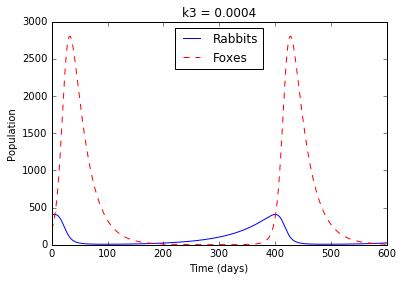

In [2]:
R = 400  # rabbits
F = 200  # foxes
TimeStep = .01

def pops(pops0, t):
    k1 = .015  # 1/days
    k2 = .00004  # 1/(days*foxes)
    k3 = .0004  # 1/(days*rabbits)
    k4 = .04  # 1/days
    dxdt = k1*pops0[0]-k2*pops0[0]*pops0[1]
    dydt = k3*pops0[0]*pops0[1]-k4*pops0[1]
    ddt = [dxdt, dydt]
    return ddt

t = np.arange(0, 600, TimeStep)
pops0 = [R, F]

populations = odeint(pops, pops0, t)

plt.plot(1)
plt.title('k3 = 0.0004')
plt.plot(t, populations[:,0], 'b-', label='Rabbits')
plt.plot(t, populations[:,1], 'r--', label='Foxes')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend(loc=0)
plt.show()

In [3]:
def second_max(Time, Var):
# Returns the second maximum of the given 1-D Array (as an int) and the corresponding time (as a float)
# This function only works if the second peak is in the second half of the data set by itself

    x, y = np.split(Var,2) # Splits the given array in two
    index = np.argmax(y)+(len(x)-1) # gives the index of the maximum value with respect to original array
    
    return ((round(Time[index], 2)), int(round(Var[index]))) # round function added because int is floor

second_max(t, populations[:,1])

(427.76999999999998, 2804)

460.576878417 77.0155835353


"\nplt.plot(t,R, 'b--', label='Rabbits')\nplt.plot(t,F, 'r', label='Foxes')\nplt.legend(loc=0)\n"

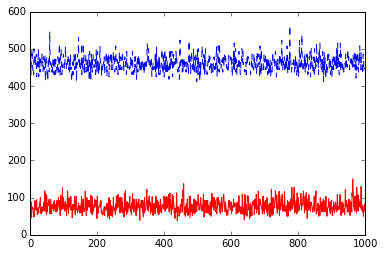

In [115]:
# Set initial conditions
Ri = 400
Fi = 200
Rf = []
Ff = []

#define rates
k1 = .015  # 1/days
k2 = .00004  # 1/(days*foxes)
k3 = .0004  # 1/(days*rabbits)
k4 = .04  # 1/days

Q = k1 + k2 + k3 + k4
r1 = k1
r2 = k1 + k2
r3 = k1 + k2 + k3

for i in range(1000):
# reset lists
    R = [Ri]
    F = [Fi]
    t = [0]

    while t[-1] <= 600:

        if F[-1] < 1:
            print("All foxes disappeared at" + " " + str(t[-1]))
            break
            
        elif R[-1] < 1:
            print("All rabbits disappeared at" + " " + str(t[-1]))
            break

        val = np.random.rand() * Q

        if val < r1:
            R.append(R[-1] + k1 * R[-1])
            F.append(F[-1])
            t.append(t[-1] + 1/Q * np.log(1/np.random.rand()))

        elif val < r2:
            R.append(R[-1] - k2 * R[-1] * F[-1])
            F.append(F[-1])
            t.append(t[-1] + 1/Q * np.log(1/np.random.rand()))

        elif val < r3:
            F.append(F[-1] + k3 * R[-1] * F[-1])
            R.append(R[-1])
            t.append(t[-1] + 1/Q * np.log(1/np.random.rand()))

        elif val < Q:
            F.append(F[-1] - k4 * F[-1])
            R.append(R[-1])
            t.append(t[-1] + 1/Q * np.log(1/np.random.rand()))

        else:
            print("Error in while loop")
            break
            
    Rf.append(R[-1])
    Ff.append(F[-1])

plt.plot(Rf, 'b--', label='Rabbits')
plt.plot(Ff, 'r', label='Foxes')
print(np.mean(Rf), np.mean(Ff))
    
'''
plt.plot(t,R, 'b--', label='Rabbits')
plt.plot(t,F, 'r', label='Foxes')
plt.legend(loc=0)
'''